# Tutorial 2: MLP Classifier

## Given Code:

#### Step 1: Importing required libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

#### Step 2: Loading and splitting dataste

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Step 4: Data Scaling

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Step 5: Creating and training MLP Classifier

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, learning_rate_init=0.001)

mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

#### Step 5: Making predictions and evaluating the model

In [5]:
y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### Step 6: Displaying the MLP structure and training information

In [6]:
print("\nMLP structure:")
print(f"Number of layers: {mlp.n_layers_}")
print(f"Number of outputs: {mlp.n_outputs_}")
print(f"Activation function: {mlp.activation}")
print(f"Output activation function: {mlp.out_activation_}")
print(f"Number of iterations: {mlp.n_iter_}")


MLP structure:
Number of layers: 4
Number of outputs: 3
Activation function: relu
Output activation function: softmax
Number of iterations: 609


#### Step 7: Visualizing the Learning curve

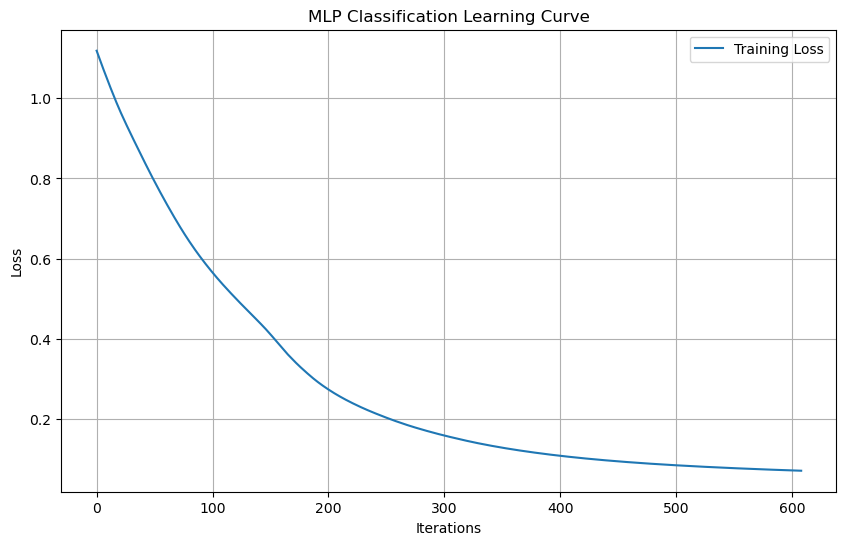

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Training Loss')    
plt.title('MLP Classification Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

TASK 1: MODIFY THR MLP MODEL TO HAVE DIFFERENT NUMBER OF HIDDEN LAYERS AND NEURONS

In [8]:
# using simple, moderate, complex models
architectures = [
    (5,), (10, 10), (20, 10, 5)]
labels = ["simple (5,)", "moderate (10,10)", "complex (20,10,5)"]
colors = ['green', 'blue', 'red']



MLP Architectures Performance:


c:\Users\M.T\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


 simple (5,) , Accuracy: 1.00 , Epochs: 1000
 moderate (10,10) , Accuracy: 1.00 , Epochs: 609
 complex (20,10,5) , Accuracy: 1.00 , Epochs: 599


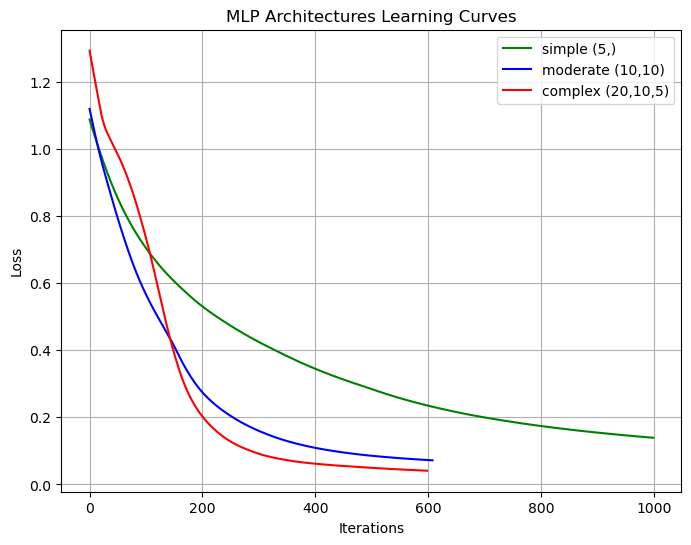

In [15]:
plt.figure(figsize=(8, 6))
print("\nMLP Architectures Performance:")
for arch, label, color in zip(architectures, labels, colors):
    mlp = MLPClassifier(hidden_layer_sizes=arch, max_iter=1000, random_state=42, learning_rate_init=0.001)
    mlp.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    print(f" {label} , Accuracy: {acc:.2f} , Epochs: {mlp.n_iter_}")
    plt.plot(mlp.loss_curve_, label=label, color=color) 

plt.title('MLP Architectures Learning Curves')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


TASK 2: CHANGE THE LEARNING RATE OF THE MLP MODEL AND OBSERVE ITS EFFECT ON CONVERGENCE


MLP Learning Rates Performance:
 Simple=0.001 , Accuracy: 1.00 , Epochs: 609
 Moderate=0.01 , Accuracy: 1.00 , Epochs: 157
 Complex=0.1 , Accuracy: 0.96 , Epochs: 159


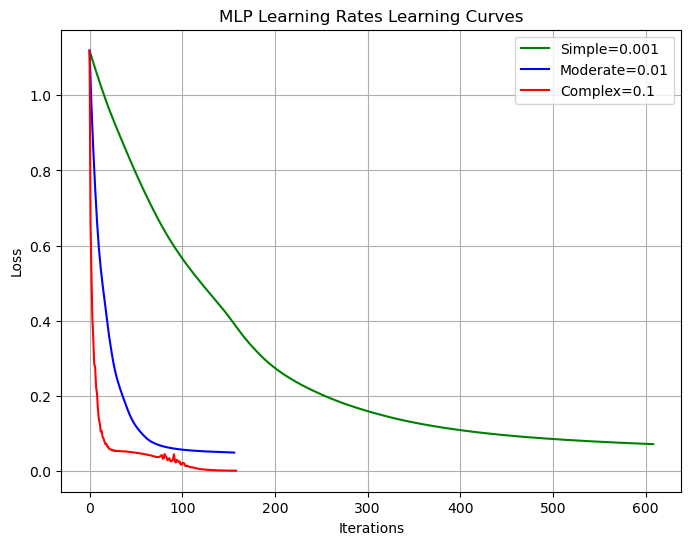

In [14]:
learning_rates = [0.001, 0.01, 0.1]
learning_rates_labels = ["Simple=0.001", "Moderate=0.01", "Complex=0.1"]
learning_rates_colors = ['green', 'blue', 'red']
plt.figure(figsize=(8, 6))
print("\nMLP Learning Rates Performance:")
for lr, label, color in zip(learning_rates, learning_rates_labels, learning_rates_colors):
    mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42, learning_rate_init=lr)
    mlp.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    print(f" {label} , Accuracy: {acc:.2f} , Epochs: {mlp.n_iter_}")
    plt.plot(mlp.loss_curve_, label=label, color=color)

plt.title('MLP Learning Rates Learning Curves')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()